In [10]:
from __future__ import print_function

import numpy as np
#import reflexxes
import random
import pandas as pd
from numpy import genfromtxt

# visualiation
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from hmmlearn import hmm
from scipy.optimize import linear_sum_assignment
from sklearn.metrics.pairwise import euclidean_distances
import datetime

import pickle

In [11]:
# load  clean data

# load noisy data
org_p = np.loadtxt('../Trajectory/data0503/original_position_list.csv', delimiter=' ')
org_v = np.loadtxt('../Trajectory/data0503/original_velocity_list.csv', delimiter=' ')
nos_p_01 = np.loadtxt('../Trajectory/data0503/position_noise_0.1.csv', delimiter=' ')
nos_p_1 = np.loadtxt('../Trajectory/data0503/position_noise_1.csv', delimiter=' ')
nos_p_2 = np.loadtxt('../Trajectory/data0503/position_noise_2.csv', delimiter=' ')
nos_p_5 = np.loadtxt('../Trajectory/data0503/position_noise_5.csv', delimiter=' ')

traj_lens = np.loadtxt('../Trajectory/data0503/traj_lens.csv', delimiter=' ')
traj_lens = traj_lens.astype(int)

In [12]:
# reframe dataset as per traj_lens
traj_lens_cumsum = traj_lens.cumsum()
traj_lens_cumsum = np.delete(traj_lens_cumsum, len(traj_lens_cumsum) - 1)

org_p_spl = np.split(org_p, traj_lens_cumsum, axis=0)
org_v_spl = np.split(org_v, traj_lens_cumsum, axis=0)
nos_p_01_spl = np.split(nos_p_01, traj_lens_cumsum, axis=0)
nos_p_1_spl = np.split(nos_p_1, traj_lens_cumsum, axis=0)
nos_p_2_spl = np.split(nos_p_2, traj_lens_cumsum, axis=0)
nos_p_5_spl = np.split(nos_p_5, traj_lens_cumsum, axis=0)

print(f'org_p.size: {len(org_p_spl)}')
print(f'nos_p_01_spl.size: {len(nos_p_01_spl)}')
print(f'nos_p_1_spl.size: {len(nos_p_1_spl)}')
print(f'nos_p_2_spl.size: {len(nos_p_2_spl)}')
print(f'nos_p_5_spl.size: {len(nos_p_5_spl)}')

org_p.size: 100
nos_p_01_spl.size: 100
nos_p_1_spl.size: 100
nos_p_2_spl.size: 100
nos_p_5_spl.size: 100


In [15]:
# plot data function
def on_key_press(event):
    if event.key == 'escape':
        plt.close()
        
def original_plot(x, dd, dddx):
    t = np.linspace(0, len(x) * gen.cycle_time, len(x))
    fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
    fig.canvas.mpl_connect('key_press_event', on_key_press)
    ax1.plot(t, x)
    ax1.set_ylabel('position')
    ax1.legend('123', title='DOF #')
    ax2.plot(t, dx)
    ax2.set_ylabel('velocity')
    ax2.legend('123', title='DOF #')
    ax3.plot(t, ddx)
    ax3.set_ylabel('acceleration')
    ax3.legend('123', title='DOF #')
    ax3.set_xlabel('time')
    plt.show()
    
def plot_trajectory(x, title):
    # x = np.array(x)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    plt.title(title)
    xline = x[:,0]
    yline = x[:,1]
    zline = x[:,2]
    ax.set_xlim3d(0,100)
    ax.set_ylim3d(0,100)
    ax.set_zlim3d(0,100)
    ax.plot3D(xline, yline, zline, 'green')

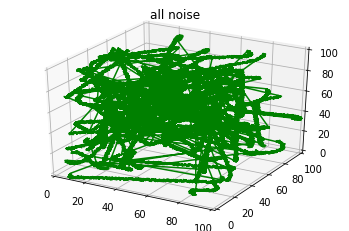

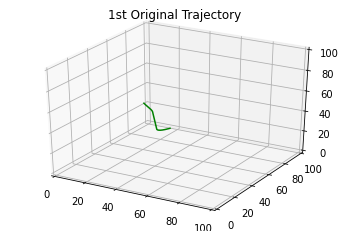

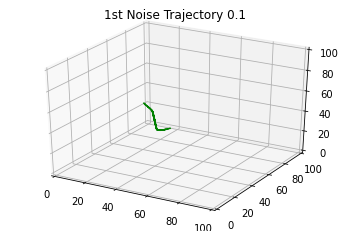

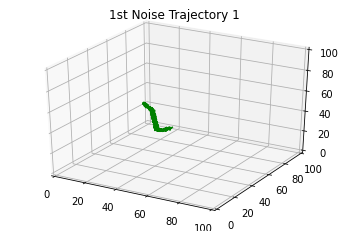

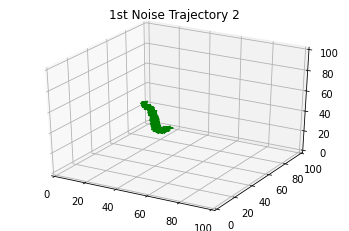

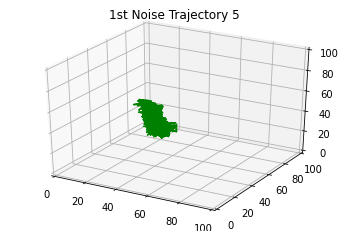

In [6]:
# plot 1st trajectory 
plot_trajectory(nos_p_1, 'all noise')
plot_trajectory(org_p_spl[0], '1st Original Trajectory')
plot_trajectory(nos_p_01_spl[0], '1st Noise Trajectory 0.1')
plot_trajectory(nos_p_1_spl[0], '1st Noise Trajectory 1')
plot_trajectory(nos_p_2_spl[0], '1st Noise Trajectory 2')
plot_trajectory(nos_p_5_spl[0], '1st Noise Trajectory 5')

In [13]:
#prepare full data
full_data = np.concatenate([org_p, org_v], axis=1)
full_data.shape

(65900, 6)

In [15]:
# try label no. = 10

# init_mean = []

# Hui Min CHANGE ME~~ : number of component in each diagonal
num = 8

# for i in range(num):
#     for j in range(num):
#         for k in range(num):
#             init_mean.append([i * (100/num) + (50/num), j * (100/num) + (50/num), k * (100/num) + (50/num)])
# #print(init_mean)   

a = datetime.datetime.now()
HMM_10 = hmm.GaussianHMM(n_components=num**3, covariance_type="spherical", n_iter=len(traj_lens), verbose=True)

# set fix mean
# HMM_10.means_ = init_mean
# HMM_10.transmat_ = np.identity(num*num*num)

# fit data: change me (org_p) to nos_p_01



HMM_10.fit(full_data, traj_lens)
b = datetime.datetime.now()
print(b-a)

1    -1529555.5018             +nan
         2    -1103244.0944     +426311.4075
         3     -853573.2719     +249670.8224
         4     -803559.5136      +50013.7583
         5     -800375.7480       +3183.7656
         6     -799671.1529        +704.5951
         7     -799282.0568        +389.0960
         8     -799039.6076        +242.4493
         9     -798869.7566        +169.8510
        10     -798734.2751        +135.4815
        11     -798627.6373        +106.6378
        12     -798531.9803         +95.6570
        13     -798460.1322         +71.8481
        14     -798402.7183         +57.4139
        15     -798354.1079         +48.6104
        16     -798312.2255         +41.8824
        17     -798275.5874         +36.6381
        18     -798243.1347         +32.4527
        19     -798214.1233         +29.0114
        20     -798187.9464         +26.1769
        21     -798163.8913         +24.0551
        22     -798140.1408         +23.7505
        23     -798

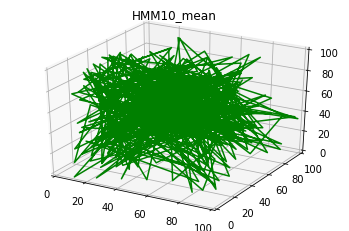

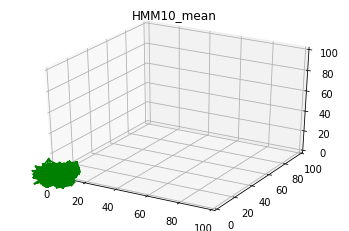

In [18]:
# plot means
plot_trajectory(HMM_10.means_, 'HMM10_mean')
plot_trajectory(HMM_10.means_[:, 3:6], 'HMM10_mean')
# print(HMM_10.means_)

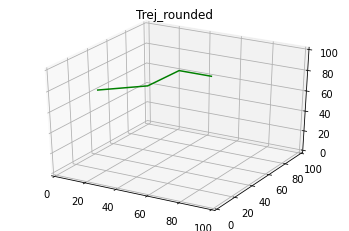

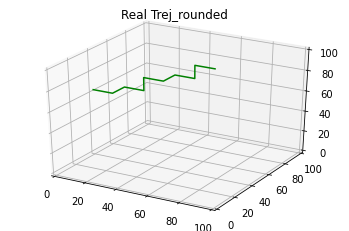

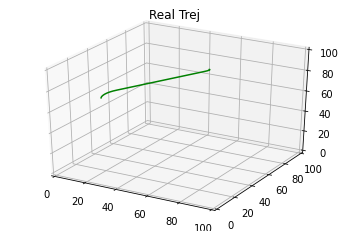

In [21]:
select_traj = 32

# load noise data for predict
replace = np.concatenate([ nos_p_01_spl[select_traj] , org_v_spl[select_traj] ], axis=1)
# load clean data for comparison
real= org_p_spl[select_traj]    

pred = HMM_10.predict(replace)
width = 100 /num
orig_rd = np.ceil(real/width)*width-width/2
trej_rd = []
trej = []

for point in pred:
    trej_rd.append(np.ceil(HMM_10.means_[point]/20)*20-10)
plot_trajectory(trej_rd, 'Trej_rounded')
plot_trajectory(orig_rd, 'Real Trej_rounded')

for point in pred:
    trej.append(HMM_10.means_[point])
#plot_trajectory(trej, 'Trej')
plot_trajectory(real, 'Real Trej')

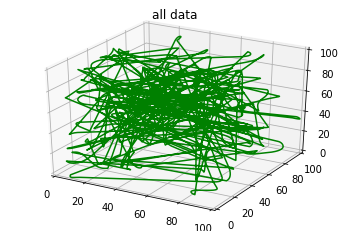

In [22]:
plot_trajectory(org_p, 'all data') # overall data

In [31]:
# Accuracy (%)
traj = replace
labels = np.zeros(len(traj))

def closest_node(node,nodes):
    # nodes = np.asarray(nodes)
    dist_2 = np.sum((nodes - node)**2,axis=1)
    return np.argmin(dist_2)

for i,data in enumerate(org_p_spl[select_traj]):
    
    labels[i] = closest_node(data,HMM_10.means_[:,:3])

print("model accuracy is: ", np.mean(labels == HMM_10.predict(traj)))

model accuracy is:  0.781437125748503


In [32]:
# export model

with open("May03_8x8x8_velocity_full_learn.pkl", "wb") as file: pickle.dump(HMM_10, file)
# use below to import   
#


In [8]:
import pickle
import numpy as np
with open("May03_8x8x8_velocity_full_learn.pkl", "rb") as file: HMM_10 = pickle.load(file)

with np.printoptions(threshold=np.inf, precision=2, suppress=True):
    print(HMM_10.means_)

.63  -5.34  10.  ]
 [ 72.67  80.1   26.74   7.75   5.86 -10.  ]
 [ 72.6   58.77  27.13  -2.54   6.23 -10.  ]
 [ 62.68  20.85   1.15  10.     3.23   0.77]
 [ 61.    20.79  93.92   3.46   6.01  -3.81]
 [ 26.96  78.33  91.79  -5.17 -10.     1.22]
 [  2.08  51.54  76.76   0.93 -10.    -0.55]
 [ 62.29  77.71  54.84   3.28  -8.23   3.84]
 [ 30.55  62.41  93.74  -3.13  -9.76   2.64]
 [ 53.24  62.76  71.46  -0.72   0.72 -10.  ]
 [ 76.22  41.43  47.23   8.39  10.    -3.43]
 [ 50.54  35.64  75.53   2.11  -5.32  10.  ]
 [ 82.44  57.08  32.74   0.19  -0.26 -10.  ]
 [ 18.76  85.8   51.9    1.86  -9.37   7.76]
 [ 14.51  33.4   66.43   5.19   4.61   4.45]
 [ 19.38  26.75 103.1   -3.13  -9.92   2.21]
 [ 70.81   0.8   97.37   8.41  -1.52   7.04]
 [ 41.86  47.05  49.37  10.     3.05  -2.93]
 [ 64.87  33.74  74.74  10.    -5.62   5.15]
 [ 88.8   46.87  91.09   1.93  -5.6    0.9 ]
 [ 40.67  63.51  76.03   0.85  -8.11  -1.5 ]
 [ 44.7   13.57  59.33  10.    -2.96   4.96]
 [  4.11  83.4   16.73  -8.52   4.77